In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from collections import Counter

from scipy import stats
from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Part A

• **DOMAIN**: Medical
    
• **CONTEXT**: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.

• **DATA DESCRIPTION**: The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

• **PROJECT OBJECTIVE**: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

#### 1. Data Understanding:

##### A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [2]:
data1 = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/2. Supervised learning/Medical/Normal.csv')
data2 = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/2. Supervised learning/Medical/Type_H.csv')
data3 = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/2. Supervised learning/Medical/Type_S.csv')

##### B. Print Shape and columns of all the 3 DataFrames.

In [3]:
#shape
print('Shape of 1st Dataframe', data1.shape)
print('Shape of 2nd Dataframe', data2.shape)
print('Shape of 3rd Dataframe', data3.shape)

Shape of 1st Dataframe (100, 7)
Shape of 2nd Dataframe (60, 7)
Shape of 3rd Dataframe (150, 7)


In [4]:
#Column Names
print('Column Names of 1st Dataframe - ', data1.columns)
print()

print('Column Names of 2nd Dataframe - ', data2.columns)
print()

print('Column Names of 3rd Dataframe - ', data3.columns)

Column Names of 1st Dataframe -  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Column Names of 2nd Dataframe -  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Column Names of 3rd Dataframe -  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


##### C. Compare Column names of all the 3 DataFrames and clearly write observations.

In [5]:
def compare(data1, data2):
    orig = set(data1.columns)
    
    c = set(data2.columns)

    #comparing Column names of all the 3 DataFrames
    if (c == orig):
        return ('Identical column names')
    else:
        return ('Non-Identical column names')

print(compare(data1, data2))
print(compare(data1, data3))

Identical column names
Identical column names


**Observation** -   Column names of all the 3 DataFrames are Identical

##### D. Print DataTypes of all the 3 DataFrames.

In [6]:
print('Datatypes of 1st Dataframe')
print(data1.info())
print()

print('Datatypes of 2nd Dataframe')
print(data2.info())
print()

print('Datatypes of 3rd Dataframe')
print(data3.info())
print()

Datatypes of 1st Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
None

Datatypes of 2nd Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degr

##### E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.

In [7]:
print(data1['Class'].value_counts())
print()

print(data2['Class'].value_counts())
print()

print(data3['Class'].value_counts())
print()

Normal    73
Nrmal     27
Name: Class, dtype: int64

Type_H    37
type_h    23
Name: Class, dtype: int64

Type_S    133
tp_s       17
Name: Class, dtype: int64



**Observation** - 

- In 1st Dataframe - There are two classes "Normal" & "Nrmal"
- In 2nd Dataframe - There are two classes "Type_H" & "type_h"
- In 2nd Dataframe - There are two classes "Type_S" & "tp_s"

-----

#### 2. Data Preparation and Exploration:

##### A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [8]:
data1.loc[data1['Class']=="Nrmal",'Class']="Normal"
data2.loc[data2['Class']=="type_h",'Class']="Type_H"
data3.loc[data3['Class']=="tp_s",'Class']="Type_S"

print(data1['Class'].value_counts())
print()

print(data2['Class'].value_counts())
print()

print(data3['Class'].value_counts())

Normal    100
Name: Class, dtype: int64

Type_H    60
Name: Class, dtype: int64

Type_S    150
Name: Class, dtype: int64


##### B. Combine all the 3 DataFrames to form a single DataFrame

In [9]:
medical = pd.concat([data1,data2,data3],axis=0,sort=False)

medical.shape

(310, 7)

##### C. Print 5 random samples of this DataFrame

In [10]:
medical.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
149,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
28,69.004913,13.291790,55.570143,55.713123,126.611621,10.832011,Normal
56,46.374088,10.215902,42.700000,36.158185,121.247657,-0.542022,Normal
25,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Type_S


##### D. Print Feature-wise percentage of Null values.

In [11]:
#creating a dataframe with sum of missing values
missing_val = pd.DataFrame(medical.isnull().sum())

#Converting row index into column.
missing_val.reset_index()

,index,0
0,P_incidence,0
1,P_tilt,0
2,L_angle,0
3,S_slope,0
4,P_radius,0
5,S_Degree,0
6,Class,0


In [12]:
#Rename the column as missing_percentage.
missing_val = missing_val.rename(columns = {0: 'Missing_percentage'})

#Calculating in terms of percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(medical))*100

#Arranging in descending order.
missing_val = missing_val.sort_values('Missing_percentage', ascending = False)

missing_val

,Missing_percentage
P_incidence,0.0
P_tilt,0.0
L_angle,0.0
S_slope,0.0
P_radius,0.0
S_Degree,0.0
Class,0.0


**Observation** - There are no missing values

##### E. Check 5-point summary of the new DataFrame.

In [13]:
#Convert Class to category
medical['Class'] = medical['Class'].astype('category')

medical.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


**5-point summary**

**1) min** - Minimum value in the column (Example: 26.147921 is the min value in "P_incidence" column)

**2) 25%** - Analyzes 25th Percentile (Example: 25% of the data is less than 46.430294	in "P_incidence" column)

**3) 50%** - Identifies the centre of a data set. (Example: Median value is 58.691038 in "P_incidence" column)

**4) 75%** - Analyzes 75th Percentile (Example: 75% of the data is less than 72.877696	in "P_incidence" column)

**5) max** -  Maximum value in the column (Example: 129.834041 is the max value in "P_incidence" column)

**Observation** -

1) Mean and Median values are approximately same for all the columns i.e, *Data is Normally distributed*.

2) We have difference between the 75% value and max value, indicating *skewness in the data*.

3) "S_Degree" Column - Mean > median. Therefore the distribution is *skewed to the right*.


------

#### 3. Data Analysis:

##### A. Visualize a heatmap to understand correlation between all features

In [14]:
medical.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


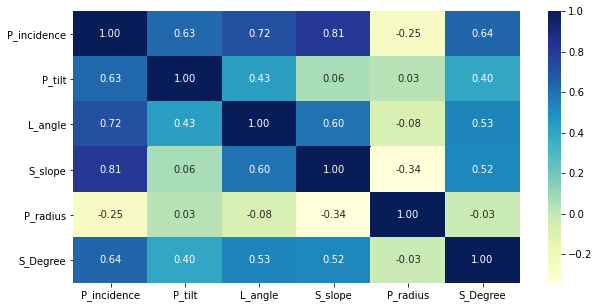

In [15]:
plt.figure(figsize=(10,5))
corrmat = medical.corr(method="pearson")
sns.heatmap(corrmat, cmap="YlGnBu", fmt='.2f',annot=True)
plt.show();

##### B. Share insights on correlation.

Correlation ranges from -1 to +1. 
- Values closer to 0: There is no linear trend between the two variables. 
- Values closer to 1: Positively correlated.
- Values closer to -1: Negatively correlated. 

###### B1. Features having stronger correlation with correlation value.

 - Consideration: 0.8 - 1.0 as **very strong correlation**

1) There is a strong correlation between "P_incidence" & "S_slope" with correlation value: 0.81

 - Consideration: 0.6 - 0.8 as **strong correlation**

2) There is a strong correlation between "P_incidence" & "L_angle" with correlation value: 0.72

3) There is a strong correlation between "P_incidence" & "S_Degree" with correlation value: 0.64

4) There is a strong correlation between "P_incidence" & "P_tilt" with correlation value: 0.63

5) There is a strong correlation between "L_angle" & "S_slope" with correlation value: 0.60

##### B2. Features having no/weaker correlation with correlation value.

- Consideration Range: -0.01 to 0.01 as **no correlation** 

1) There is no correlation between "P_tilt" & "S_slope" with correlation value: 0.06

2) There is no correlation between "P_tilt" & "P_radius" with correlation value: 0.03

3) There is no correlation between "L_angle" & "P_radius" with correlation value: -0.08

4) There is no correlation between "S_Degree" & "P_radius" with correlation value: -0.03


- Other **weaker correlation**

1) There is a negative correlation between "P_incidence" & "P_radius" with correlation value: -0.25

2) There is a negative correlation between "S_slope" & "P_radius" with correlation value: -0.34

##### C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

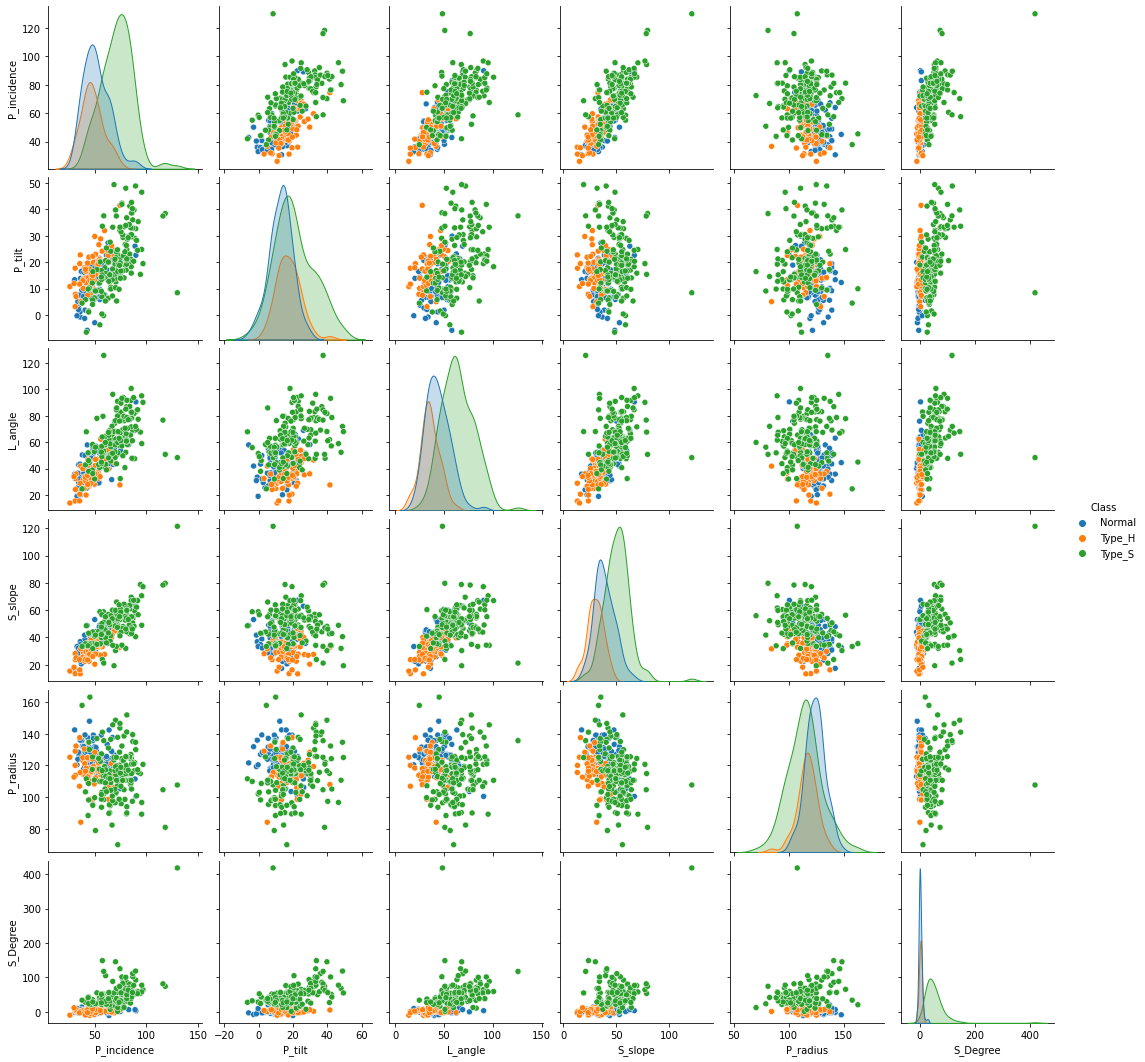

In [16]:
sns.pairplot(medical,hue='Class')

**Observation** -

- Diagonal indicates -

1) Most of the data are Normally distributed because mean ~ median. (As observed in 5 point summary)

2) The data is skewed towards right for "S_Degree" because Mean > Median

- Scatter plot indicates - (Similar to insights from correlation)

3). Positive/strong correlation between

- "P_incidence" & "S_slope" 
- "P_incidence" & "L_angle"
- "P_incidence" & "P_tilt" 
- "L_angle" & "S_slope"

- "P_incidence" & "S_Degree"  - From correlation it was observation as strong relation but we dont observe the same here. (Outlier)

4). No correlation between

- "P_tilt" & "S_slope"

- "P_tilt" & "P_radius" 

- "L_angle" & "P_radius"

- "S_Degree" & "P_radius"

- "P_incidence" & "P_radius"

- "S_slope" & "P_radius"

5) The Count of (green) Type_S is more compared to two other classes

6) Some of the (green) Type_S datapoints are far away from usual range, indicating the presence of outliers.


##### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

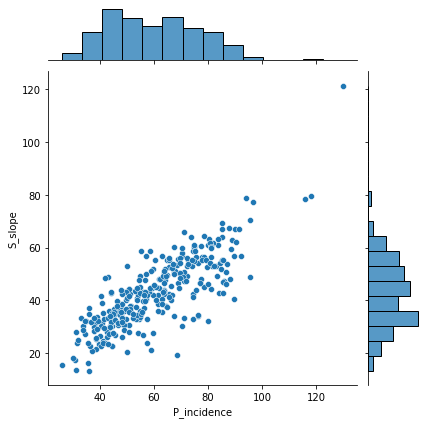

In [17]:
sns.jointplot(medical['P_incidence'], medical['S_slope'])

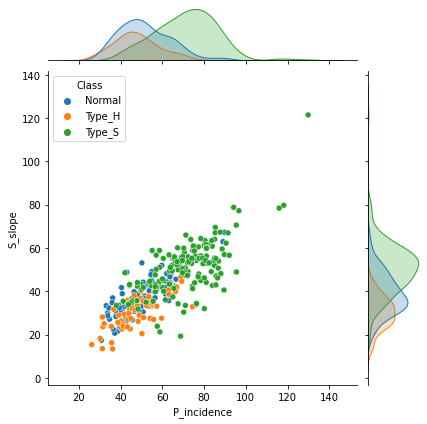

In [18]:
sns.jointplot(x='P_incidence', y='S_slope', data=medical, hue='Class')

**Observation** -

- **Scatter Plot** -

a) Seems to be a *positive relationship* between the columns 'P_incidence' and 'S_slope', because if the values of one variable increase so does the other.

b) *The strength of the relationship appears to be strong* because the points are linear in the graph.

c) The Count of (green) Type_S is more compared to two other classes

- **Marginal histogram/hue** - 

c) The marginal histograms are both slightly right-skewed as most values are concentrated around the left side of the distribution while the right side of the distribution is longer. 

d) Outliers are the data points that lie far away from the rest of the data values, in the graph we can see outliers in the scatterplot as well as the histograms.



##### E. Visualize a boxplot to check distribution of the features and share insights.

##### P_incidence

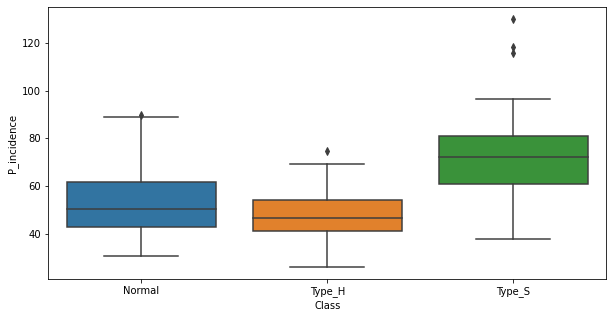

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='P_incidence', data=medical)
plt.show()

**Observation** -

P_Incidence Value is max for Type_S Class & min for Type_H Class.

 **Shorter box plot (Type_H)** - This suggests that data is less dispersed between each sample in 'P_incidence' with Type_H.

**Comparatively tall box plot (Type_S)** – This suggests that data is more dispersed between each sample in 'P_incidence' with Type_S.

Median line of Type_S box plot lies outside of the box of a Normal & Type_H, which indicates difference between the two groups.

**Outliers** - We can observe few outliers outside the whiskers of the box plot.

##### P_tilt

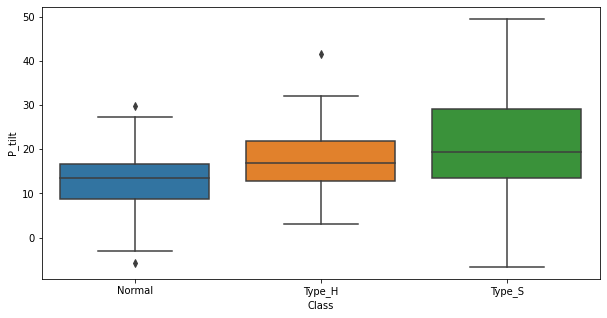

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='P_tilt', data=medical)
plt.show()

**Observation** -

P_tilt Value is max & min for Type_S Class.

**Comparatively tall box plot (Type_S)** – This suggests that data is more dispersed between each sample in 'P_tilt' with Type_S.

**Similar median, different distribution**  – The medians (which generally will be close to the mean) are at the same level (approx) for Type_H & Type_S. However the box plots in these Class show very different distributions of views.

Mean of Type_S is slightly higher than Type_H & Normal Class

**Outliers** - We can observe few outliers outside the whiskers of the box plot.

##### L_angle

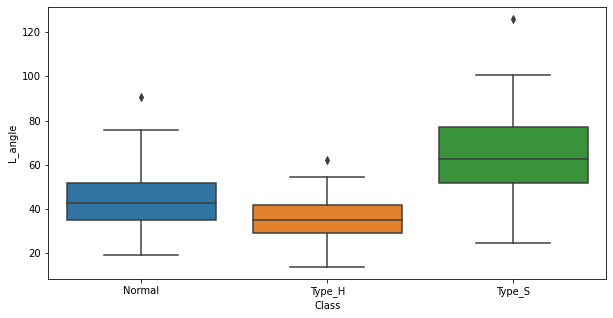

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='L_angle', data=medical)
plt.show()

**Observation** - 

**Outliers** - We can observe few outliers outside the whiskers of the box plot.

L_Angle has max value for Type_S Class and min for Type_H Class.

**Shorter box plot (Type_H)** - This suggests that data is less dispersed between each sample in 'L_angle' with Type_H.

**Comparatively tall box plot (Type_S)** – This suggests that data is more dispersed between each sample in 'L_angle' with Type_S.

Median line of Type_S box plot lies outside of the box of a Normal & Type_H, which indicates difference between the two groups.


##### S_slope

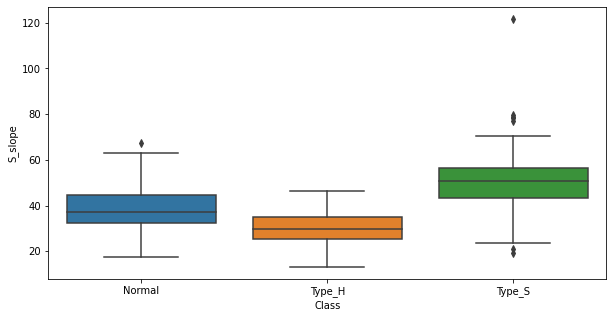

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='S_slope', data=medical)
plt.show()

**Observation** - 

**Outliers** - We can observe few outliers outside the whiskers of the box plot.

S_Slope has max value for Type_S Class min for Type_H Class.

Median line of Type_S box plot lies outside of the box of a Normal & Type_H, which indicates difference between the two groups.


##### P_radius

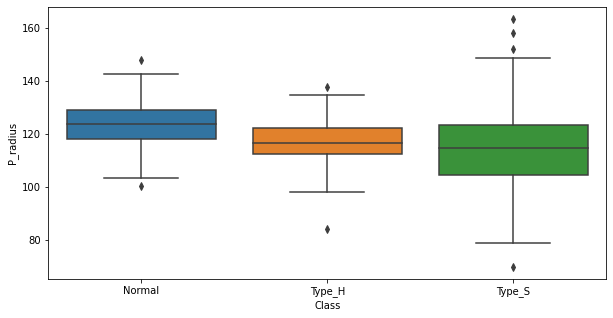

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='P_radius', data=medical)
plt.show()

**Observation** -

**Outliers** - We can observe few outliers outside the whiskers of the box plot.

P_radius has max and min value for Type_S Class

**One box plot is much lower than another** – This could suggest a difference between groups.

**Similar median, different distribution**  (Type_H & Type_S) – The medians (which generally will be close to the mean) are all at the same level (approx). However the box plots in these Class show very different distributions of views.



##### S_Degree

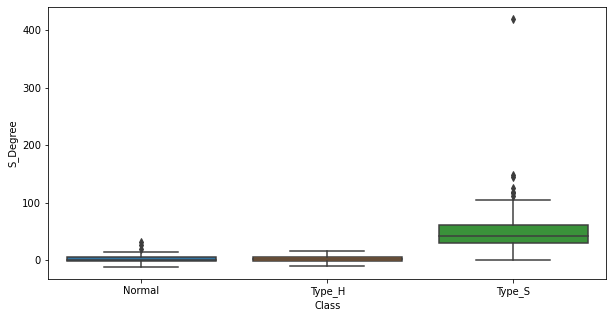

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='S_Degree', data=medical)
plt.show()

**Observation** -

**Outliers** - We can observe few outliers outside the whiskers of the box plot.

Median line of Type_S box plot lies outside of the box of a Normal & Type_H, which indicates difference between the two groups.

**One box plot is much higher than another**  – This could suggest a difference between groups. 

------

#### 4. Model Building:

##### A. Split data into X and Y.

In [25]:
LE =LabelEncoder()
medical['Class'] = LE.fit_transform(medical['Class'])
medical['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

2 = Type_S

0 = Normal

1 = Type_H

##### Lets check for data imbalance

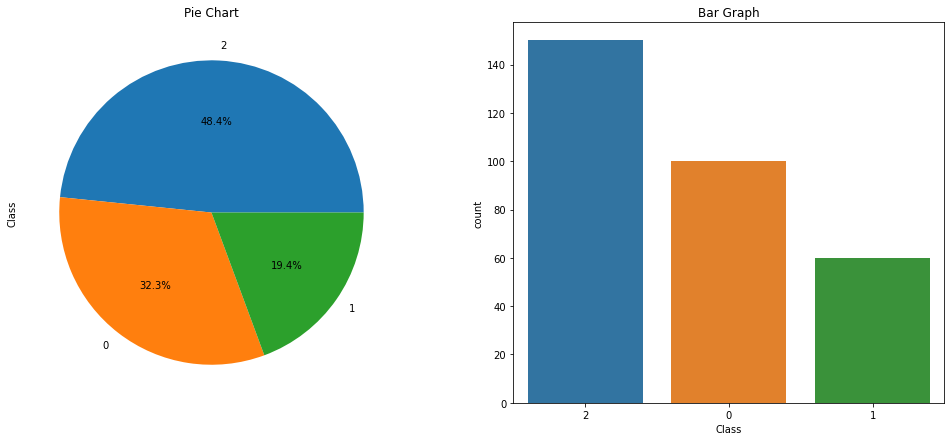

In [26]:
f,axes=plt.subplots(1,2,figsize=(17,7))
medical['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=medical,ax=axes[1],order=[2,0,1])
axes[0].set_title('Pie Chart')
axes[1].set_title('Bar Graph')
plt.show()

**Observation** -

1. There is huge imbalance in target variable - 
- 48.4% are Type_S.
- 32.3% are Normal.
- 19.4% are Type_H.

2. The model evaluation methods do not accurately measure model performance when faced with imbalanced datasets.

3. Imbalanced data will Impact/degrade the performance of the model.

4. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them.This results in a highly biased model.

In [27]:
medical['Class'] = medical['Class'].astype('category')

X = medical.drop(['Class'],axis=1)     
Y = medical['Class']

print(X.shape)
print(Y.shape)

X.describe().T

(310, 6)
(310,)


,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


##### B. Split data into train and test with 80:20 proportion.

##### Scaling

In [28]:
XScaled  = X.apply(zscore)
XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,1.042177e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.096889e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,2.829278e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-5.071212e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-1.277204e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


In [29]:
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.20, random_state=1)

##### C. Train a Supervised Learning Classification base model using KNN classifier.

In [30]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)

print('Accuracy on Training data:',KNN.score(x_train, y_train))
print('Accuracy on Test data:',KNN.score(x_test, y_test))

Accuracy on Training data: 0.8467741935483871
Accuracy on Test data: 0.7258064516129032


**Observation** - Accuracy on test data is less than training data. (Overfitting)

##### D. Print all the possible performance metrics for both train and test data.

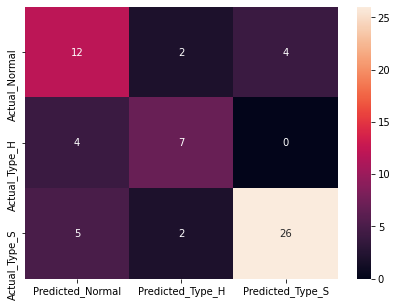

In [31]:
cm = metrics.confusion_matrix(y_test, KNN_pred, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual_Normal","Actual_Type_H", "Actual_Type_S"]],
                  columns = [i for i in ["Predicted_Normal","Predicted_Type_H", "Predicted_Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [32]:
print("Classification Report")
print(metrics.classification_report(y_test, KNN_pred, labels=[0, 1, 2]))

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        18
           1       0.64      0.64      0.64        11
           2       0.87      0.79      0.83        33

    accuracy                           0.73        62
   macro avg       0.69      0.70      0.69        62
weighted avg       0.74      0.73      0.73        62



**Observation** -

- Our model predicts *Type_S* correctly most of the time.

- Misclassification of labels are more when predicting *Normal class*.

-------------------------------------------------------------------------------------------------------------------------

**The main diagonal** - (12, 7, 26) gives the correct predictions. 

**Class - Normal**

**The first row** (Actual_Normal) -  The model predicted 12 of these correctly and incorrectly predicted 2 as Type_H and 4 as Type_S.

Looking at the **Predicted_Normal column**, of the 21 Normal predicted by the model (sum of Predicted_Normal column - 12+4+5),
- 12 were Actual_Normal.

- 4 were Type_H incorrectly predicted to be Normal.

- 5 were Type_S incorrectly predicted to be Normal.

-------------------------------------------------------------------------------------------------------------------------------

**Class - Type_H**

**The second row** (Actual_Type_H) -  The model predicted 7 of these correctly and incorrectly predicted 4 as Normal and 0 as Type_S.

Looking at the **Predicted_Type_H column**, of the 11 Type_H predicted by the model (sum of Predicted_Type_H column - 2+7+2),
- 7 were Actual_Type_H.

- 2 were Normal incorrectly predicted to be Type_H.

- 2 were Type_S incorrectly predicted to be Type_H.

-------------------------------------------------------------------------------------------------------------------------------

**Class - Type_S**

**The Third row** (Actual_Type_S) -  The model predicted 26 of these correctly and incorrectly predicted 5 as Normal and 2 as Type_H.

Looking at the **Predicted_Type_S column**, of the 30 Type_S predicted by the model (sum of Predicted_Type_H column - 4+0+26),
- 26 were Actual_Type_S.

- 4 were Normal incorrectly predicted to be Type_S.

- 0 were Type_H incorrectly predicted to be Type_S.

--------

#### 5. Performance Improvement:

##### A. Experiment with various parameters to improve performance of the base model.

In [33]:
parameters = { 'n_neighbors' : [5,7,9,11,13,15,17,19,21],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

GS = GridSearchCV(KNeighborsClassifier(), parameters, verbose = 1, cv=3, n_jobs = -1)

G_res = GS.fit(x_train, y_train)

# find the best score
print('Best Score:', G_res.best_score_)

print()

# get the hyperparameters with the best score
print('Best Hyperparameters:', G_res.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Score: 0.802527181898325

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 17, 'weights': 'distance'}


In [34]:
# use the best hyperparameters
#Train a Supervised Learning Classification base model - KNN
KNN_hp = KNeighborsClassifier(n_neighbors= 17 , weights = 'distance', metric= 'minkowski', algorithm= 'auto')
KNN_hp.fit(x_train, y_train)
KNN_hp_pred = KNN_hp.predict(x_test)

print('Accuracy on Training data:',KNN_hp.score(x_train, y_train))
print('Accuracy on Test data:',KNN_hp.score(x_test, y_test))

Accuracy on Training data: 1.0
Accuracy on Test data: 0.7419354838709677


**Observation** - Accuracy on test data is lesser than training data. (Overfitting)

##### B. Clearly showcase improvement in performance achieved.

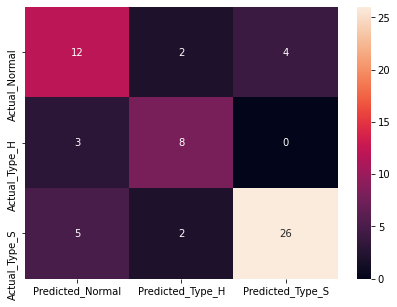

In [35]:
cm = metrics.confusion_matrix(y_test, KNN_hp_pred, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual_Normal","Actual_Type_H", "Actual_Type_S"]],
                  columns = [i for i in ["Predicted_Normal","Predicted_Type_H", "Predicted_Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [36]:
print("Classification Report")
print(metrics.classification_report(y_test, KNN_hp_pred, labels=[0, 1, 2]))

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        18
           1       0.67      0.73      0.70        11
           2       0.87      0.79      0.83        33

    accuracy                           0.74        62
   macro avg       0.71      0.73      0.72        62
weighted avg       0.75      0.74      0.75        62



**Observation** 

**Accuracy** - There isn't much difference in accuracy even after Optimizing the model. i.e, there is change from 73% to 74%.

**Precision** - 

- **Normal** - Change from 57% to 60%

- **Type_H** -  Change from 64% to 67%

- **Type_S** -  Remains same.

**Recall** -

- **Normal** - Remains same.

- **Type_H** -  Change from 64% to 73%

- **Type_S** -  Remains same.

**Other Observation** - 

- Our model predicts *Type_S* correctly most of the time.

- Misclassification of labels are more when predicting *Normal class.*

(This maybe due to imbalanced data as observed above)


##### C. Clearly state which parameters contributed most to improve model performance.

**Best Hyperparameters**: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 17, 'weights': 'distance'} with the **Best Score**: 0.802527181898325
    


------

# Part B

• **DOMAIN**: Banking, Marketing

• **CONTEXT**: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers (depositors) vs asset customers (borrowers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

• **DATA DICTIONARY:**
1. **Team**: Team’s name
2. **ID**: Customer ID
3. **Age**: Customer’s approximate age.
4. **CustomerSince**: Customer of the bank since. [unit is masked]
5. **HighestSpend**: Customer’s highest spend so far in one transaction. [unit is masked]
6. **ZipCode**: Customer’s zip code.
7. **HiddenScore**: A score associated to the customer which is masked by the bank as an IP.
8. **MonthlyAverageSpend**: Customer’s monthly average spend so far. [unit is masked]
9. **Level**: A level associated to the customer which is masked by the bank as an IP.
10. **Mortgage**: Customer’s mortgage. [unit is masked]
11. **Security**: Customer’s security asset with the bank. [unit is masked]
12. **FixedDepositAccount**: Customer’s fixed deposit account with the bank. [unit is masked]
13. **InternetBanking**: if the customer uses internet banking.
14. **CreditCard**: if the customer uses bank’s credit card.
15. **LoanOnCard**: if the customer has a loan on credit card.

• **PROJECT OBJECTIVE**: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

#### 1. Data Understanding and Preparation:

##### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [37]:
data1 = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/2. Supervised learning/Banking/Data1.csv')
data2 = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/2. Supervised learning/Banking/Data2.csv')

##### B. Print shape and Column Names and DataTypes of both the Dataframes.

In [38]:
#shape
print('Shape of 1st Dataframe', data1.shape)
print('Shape of 2nd Dataframe', data2.shape)

Shape of 1st Dataframe (5000, 8)
Shape of 2nd Dataframe (5000, 7)


In [39]:
#Column Names & Datatypes

print('Column Names and datatypes of 1st Dataframe')
print(data1.info())
print()

print('Column Names and datatypes of 2nd Dataframe')
print(data2.info())
print()

Column Names and datatypes of 1st Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
None

Column Names and datatypes of 2nd Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   

##### C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [40]:
bank = pd.merge(data1,data2,how='outer',on='ID')

print(bank.shape)
print()

bank.head()

(5000, 14)



,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


##### D. Change Datatype of below features to ‘Object’

‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]

In [41]:
for col in ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']:
    bank[col] = bank[col].astype('object')
    
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


-------

#### 2. Data Exploration and Analysis:

##### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

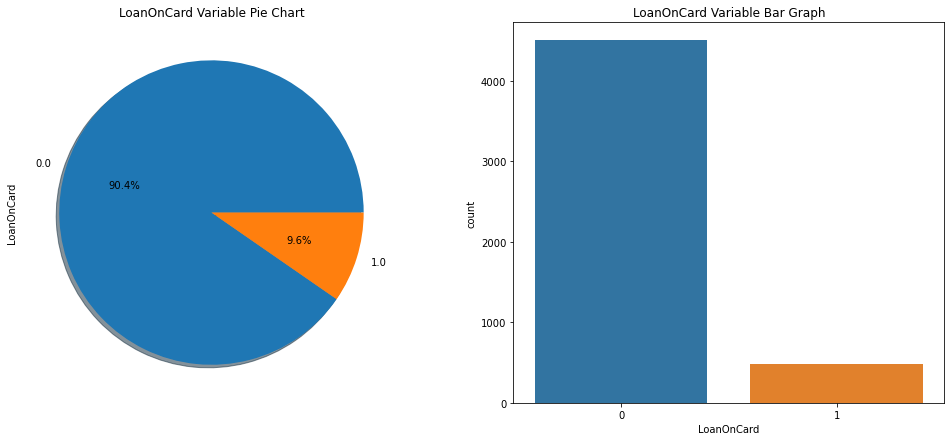

In [42]:
f,axes=plt.subplots(1,2,figsize=(17,7))
bank['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=bank,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

In [43]:
bank['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

**Observation** - 

1. There is huge imbalance in target variable - 
- 90.4% are Non-Loan holders i.e, 4500 of customers didn't accept the loan offered to them in the campaign that the bank ran last year. (class 0)
- 9.6% are Loan holders i.e, 480 of customers accepted the loan that was offered to them in the campaign that the bank ran last year. (class 1)

2. The model evaluation methods do not accurately measure model performance when faced with imbalanced datasets.

3. Imbalanced data will Impact/degrade the performance of the model.

4. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them.This results in a highly biased model.

##### B. Check the percentage of missing values and impute if required.

In [44]:
#creating a dataframe with sum of missing values
missing_val = pd.DataFrame(bank.isnull().sum())

#Converting row index into column.
missing_val.reset_index()


,index,0
0,ID,0
1,Age,0
2,CustomerSince,0
3,HighestSpend,0
4,ZipCode,0
5,HiddenScore,0
6,MonthlyAverageSpend,0
7,Level,0
8,Mortgage,0
9,Security,0


In [45]:
#Rename the column as missing_percentage.
missing_val = missing_val.rename(columns = {0: 'Missing_percentage'})

#Calculating in terms of percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(bank))*100

#Arranging in descending order.
missing_val = missing_val.sort_values('Missing_percentage', ascending = False)

missing_val

,Missing_percentage
LoanOnCard,0.4
ID,0.0
Age,0.0
CustomerSince,0.0
HighestSpend,0.0
ZipCode,0.0
HiddenScore,0.0
MonthlyAverageSpend,0.0
Level,0.0
Mortgage,0.0


**Observation** - We have very less missing value percentage (0.4%) in LoanOnCard variable, so we will drop the 20 missing records

In [46]:
bank.dropna(axis=0,inplace=True)

print(bank.shape)
bank.isnull().sum()

(4980, 14)


ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

##### C. Check for unexpected values in each categorical variable and impute with best suitable value.

[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

categorical variables = 'CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore'

In [47]:
# CreditCard 
print('CreditCard')
Credit_Card = pd.DataFrame(bank.CreditCard.astype(str).str.isdigit())  
print(bank[Credit_Card['CreditCard'] == False])

print()

# InternetBanking 
print('InternetBanking')
Internet_Banking = pd.DataFrame(bank.InternetBanking.astype(str).str.isdigit())  
print(bank[Internet_Banking['InternetBanking'] == False])

print()

# FixedDepositAccount
print('FixedDepositAccount')
FixedDeposit_Account = pd.DataFrame(bank.FixedDepositAccount.astype(str).str.isdigit())  
print(bank[FixedDeposit_Account['FixedDepositAccount'] == False])

print()

# Security
print('Security')
Security_ = pd.DataFrame(bank.Security.astype(str).str.isdigit())  
print(bank[Security_['Security'] == False])

print()

# Level
print('Level')
Level_ = pd.DataFrame(bank.Level.astype(str).str.isdigit())  
print(bank[Level_['Level'] == False])

print()

# HiddenScore
print('HiddenScore')
Hidden_Score = pd.DataFrame(bank.HiddenScore.astype(str).str.isdigit())  
print(bank[Hidden_Score['HiddenScore'] == False])


CreditCard
Empty DataFrame
Columns: [ID, Age, CustomerSince, HighestSpend, ZipCode, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

InternetBanking
Empty DataFrame
Columns: [ID, Age, CustomerSince, HighestSpend, ZipCode, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

FixedDepositAccount
Empty DataFrame
Columns: [ID, Age, CustomerSince, HighestSpend, ZipCode, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

Security
Empty DataFrame
Columns: [ID, Age, CustomerSince, HighestSpend, ZipCode, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard]
Index: []

Level
Empty DataFrame
Columns: [ID, Age, CustomerSince, HighestSpend, ZipCode, HiddenScore, MonthlyAverageSpend, Lev

**Observation** - There are no unexpected values in any categorical Variables

In [48]:
print(bank.shape)
print()

bank.info()

(4980, 14)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   object 
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   object 
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   object 
 10  FixedDepositAccount  4980 non-null   object 
 11  InternetBanking      4980 non-null   object 
 12  CreditCard           4980 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 583.6+ KB


-----

#### 3. Data Preparation and model building:

##### A. Split data into X and Y.

In [49]:
X = bank.drop(['ID', 'ZipCode','LoanOnCard'],axis=1)     
Y = bank['LoanOnCard']

print(X.shape)
print(Y.shape)

(4980, 11)
(4980,)


#### B. Split data into train and test. Keep 25% data reserved for testing.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

##### C. Train a Supervised Learning Classification base model - Logistic Regression.

In [51]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
logit_pred = logit.predict(x_test)

print('Accuracy on Training data:',logit.score(x_train, y_train))
print('Accuracy on Test data:',logit.score(x_test, y_test))

Accuracy on Training data: 0.9504685408299867
Accuracy on Test data: 0.944578313253012


**Observation** - Accuracy on train & Test data are almost similar

##### D. Print evaluation metrics for the model and clearly share insights.

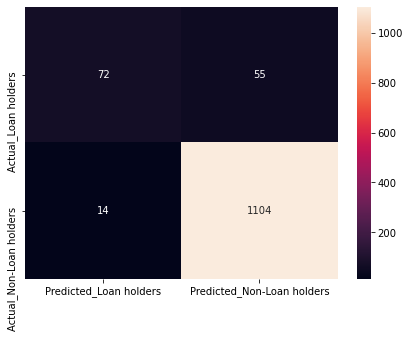

In [52]:
cm = metrics.confusion_matrix(y_test, logit_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual_Loan holders","Actual_Non-Loan holders"]],
                  columns = [i for i in ["Predicted_Loan holders","Predicted_Non-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [53]:
print("Classification Report")
print(metrics.classification_report(y_test, logit_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.84      0.57      0.68       127
           0       0.95      0.99      0.97      1118

    accuracy                           0.94      1245
   macro avg       0.89      0.78      0.82      1245
weighted avg       0.94      0.94      0.94      1245



**Observation** - 

**From Confusion Metrics** -

- True Positives (**TP**): we correctly predicted as Loan holders - **72**

- True Negatives (**TN**): we correctly predicted as Non-Loan holders - **1104**

- False Positives (**FP**): we incorrectly predicted as Loan holders ("Type I error") - **14** 

- False Negatives (**FN**): we incorrectly predicted as Non-Loan holders ("Type II error") - **55**

-**From Classification Report** -

**Precision** -  Is a  case where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.

**Recall** - Is a case where actually the personal was accepted by the customer but we predicted it as not accepted.

1. **Accuracy** - our model is 94% accurate, but we cannot consider this as the good model because the data is imbalanced.


2. **Precision** - 
- **Loan holders (Class 1)** - 84%
- **Non-Loan holders (Class 0)** - 95%
 
3. **Recall** - 
- **Loan holders (Class 1)** - 57%
- **Non-Loan holders (Class 0)** - 99%

Our model is poor in predicting Class 1 - Loan holders because of imbalanced data.

In our case, it would be recall that would hold more importance than precision

##### E. Balance the data using the right balancing technique.

i. Check distribution of the target variable

ii. Say output is class A : 20% and class B : 80%

iii. Here you need to balance the target variable as 50:50.

iv. Try appropriate method to achieve the same.

In [54]:
print("Original LoanOnCard-Loan holders Values : {0} ({1:0.2f}%)".format(len(bank.loc[bank['LoanOnCard'] == 1]), (len(bank.loc[bank['LoanOnCard'] == 1])/len(bank.index)) * 100))
print("Original LoanOnCard-Non-Loan holders Values : {0} ({1:0.2f}%)".format(len(bank.loc[bank['LoanOnCard'] == 0]), (len(bank.loc[bank['LoanOnCard'] == 0])/len(bank.index)) * 100))
print("")
print("Training LoanOnCard-Loan holders Values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training LoanOnCard-Non-Loan holders Values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test LoanOnCard-Loan holders Values : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test LoanOnCard-Non-Loan holders Values : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original LoanOnCard-Loan holders Values : 480 (9.64%)
Original LoanOnCard-Non-Loan holders Values : 4500 (90.36%)

Training LoanOnCard-Loan holders Values : 353 (9.45%)
Training LoanOnCard-Non-Loan holders Values : 3382 (90.55%)

Test LoanOnCard-Loan holders Values : 127 (10.20%)
Test LoanOnCard-Non-Loan holders Values : 1118 (89.80%)



**Observation**:Imbalanced data

a) Class 1 : Loan holders ~ 10%

b) Class 2 : Non-Loan holders ~ 90%

- Approach to handling Imbalanced Data: **Resampling Techniques**
1. **Random Undersampling** -  aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.
2. **Random Oversampling** - increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

- Here we will use **Oversampling** because undersampling may remove important information from the dataset

To do that, one such technique is Synthetic Minority Oversampling Technique, or **SMOTE** for short.

We will apply the SMOTE technique to **Original dataset (4980)** with **480 Loan holders Values (9.64%)** & **4500 Non-Loan holders Values (90.36%)**

In [55]:
snc=SMOTENC(categorical_features=[1,3,5],random_state=42)
X_snc,Y_snc=snc.fit_resample(X,Y)

##### Split data into train and test. Keep 25% data reserved for testing.

In [56]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_snc, Y_snc, test_size=0.25, random_state=1)

In [57]:
print("Before_SMOTE-Loan holders Values : {0} ({1:0.2f}%)".format(len(bank.loc[bank['LoanOnCard'] == 1]), (len(bank.loc[bank['LoanOnCard'] == 1])/len(bank.index)) * 100))
print("Before_SMOTE-Non-Loan holders Values : {0} ({1:0.2f}%)".format(len(bank.loc[bank['LoanOnCard'] == 0]), (len(bank.loc[bank['LoanOnCard'] == 0])/len(bank.index)) * 100))
print("")
print("After_SMOTE-Training-Loan holders Values : {0} ({1:0.2f}%)".format(len(y_train_s[y_train_s[:] == 1]), (len(y_train_s[y_train_s[:] == 1])/len(y_train_s)) * 100))
print("After_SMOTE-Training-Non-Loan holders Values : {0} ({1:0.2f}%)".format(len(y_train_s[y_train_s[:] == 0]), (len(y_train_s[y_train_s[:] == 0])/len(y_train_s)) * 100))
print("")
print("After_SMOTE-Test-Loan holders Values : {0} ({1:0.2f}%)".format(len(y_test_s[y_test_s[:] == 1]), (len(y_test_s[y_test_s[:] == 1])/len(y_test_s)) * 100))
print("After_SMOTE-Test-Non-Loan holders Values : {0} ({1:0.2f}%)".format(len(y_test_s[y_test_s[:] == 0]), (len(y_test_s[y_test_s[:] == 0])/len(y_test_s)) * 100))
print("")

Before_SMOTE-Loan holders Values : 480 (9.64%)
Before_SMOTE-Non-Loan holders Values : 4500 (90.36%)

After_SMOTE-Training-Loan holders Values : 3354 (49.69%)
After_SMOTE-Training-Non-Loan holders Values : 3396 (50.31%)

After_SMOTE-Test-Loan holders Values : 1146 (50.93%)
After_SMOTE-Test-Non-Loan holders Values : 1104 (49.07%)



The dataset is now balanced with ~ 50% in both the classes

##### F. Again train the same previous model on balanced data.

In [58]:
logit_s = LogisticRegression()
logit_s.fit(x_train_s, y_train_s)
logit_pred_s = logit_s.predict(x_test_s)

print('Accuracy on Training data:',logit_s.score(x_train_s, y_train_s))
print('Accuracy on Test data:',logit_s.score(x_test_s, y_test_s))

Accuracy on Training data: 0.8933333333333333
Accuracy on Test data: 0.9008888888888889


##### G. Print evaluation metrics and clearly share differences observed.

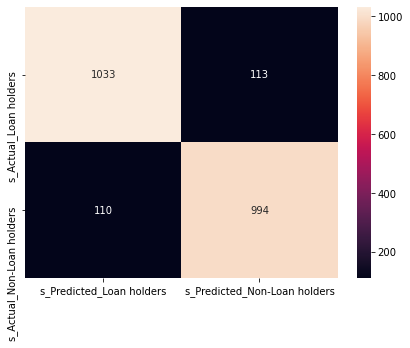

In [59]:
cm_s = metrics.confusion_matrix(y_test_s, logit_pred_s, labels=[1,0])

df_cm_s = pd.DataFrame(cm_s, index = [i for i in ["s_Actual_Loan holders","s_Actual_Non-Loan holders"]],
                  columns = [i for i in ["s_Predicted_Loan holders","s_Predicted_Non-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_s, annot=True ,fmt='g')
plt.show()

In [60]:
print("Classification Report_SMOTE")
print(metrics.classification_report(y_test_s, logit_pred_s, labels=[1, 0]))

Classification Report_SMOTE
              precision    recall  f1-score   support

           1       0.90      0.90      0.90      1146
           0       0.90      0.90      0.90      1104

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250



**Observations** -

**From Confusion Metrics** -

- True Positives (**TP**): we correctly predicted as Loan holders - **1033**

- True Negatives (**TN**): we correctly predicted as Non-Loan holders - **994**

- False Positives (**FP**): we incorrectly predicted as Loan holders ("Type I error") - **110** 

- False Negatives (**FN**): we incorrectly predicted as Non-Loan holders ("Type II error") - **113**

**From Classification Report** -

**Before SMOTE** -

Our model is poor in predicting Class 1 - Loan holders because of imbalanced data

**After SMOTE** -


**Accuracy**- is reduced from 94% to 90%, Our model is working better in predicting Class 1 - Loan holders.
Recall percentage has increased.

**Precision** -
- **Loan holders (Class 1)** - Change from 84% to 90%
- **Non-Loan holders (Class 0)** - change from 95% to 90%
 
**Recall** - 
- **Loan holders (Class 1)** - change from 57% to 90%
- **Non-Loan holders (Class 0)** - change from 99% to 90%

The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests.Therefore, it would be recall that would hold more importance then precision.

-----

#### 4. Performance Improvement:

##### Scaling

In [61]:
#Converting Categorical Variables to int datatype for scaling

for col in ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']:
    X[col] = X[col].astype('int')

XScaled  = X.apply(zscore) #X is imbalanced data
XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,-1.581065e-16,1.0001,-1.949969,-0.903128,-0.030761,0.841607,1.888448
CustomerSince,4980.0,-8.493875e-17,1.0001,-2.015918,-0.882286,-0.010261,0.861764,1.995396
HighestSpend,4980.0,-3.322420e-16,1.0001,-1.429540,-0.756584,-0.213878,0.524202,3.259439
HiddenScore,4980.0,3.342262e-16,1.0001,-1.216634,-1.216634,-0.344859,0.526916,1.398691
MonthlyAverageSpend,4980.0,1.652404e-16,1.0001,-1.108414,-0.708375,-0.251188,0.334583,4.606425
Level,4980.0,5.178366e-16,1.0001,-1.048644,-1.048644,0.141747,1.332139,1.332139
Mortgage,4980.0,-1.341631e-16,1.0001,-0.555747,-0.555747,-0.555747,0.436136,5.680349
Security,4980.0,-6.706594e-16,1.0001,-0.341456,-0.341456,-0.341456,-0.341456,2.928638
FixedDepositAccount,4980.0,1.842123e-16,1.0001,-0.254082,-0.254082,-0.254082,-0.254082,3.935742
InternetBanking,4980.0,4.582234e-16,1.0001,-1.217601,-1.217601,0.821287,0.821287,0.821287


In [62]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(XScaled, Y, test_size=0.25, random_state=1)

##### A. Train a base model each for SVM, KNN.

###### SVM

In [63]:
#Train a Supervised Learning Classification base model - SVM
sv = svm.SVC()
sv.fit(x_train_new , y_train_new)
sv_pred = sv.predict(x_test_new)

print('Accuracy on Training data:',sv.score(x_train_new, y_train_new))
print('Accuracy on Test data:',sv.score(x_test_new, y_test_new))

Accuracy on Training data: 0.9796519410977242
Accuracy on Test data: 0.9775100401606426


**Observation** - Accuracy on Training and Test data are almost similar.

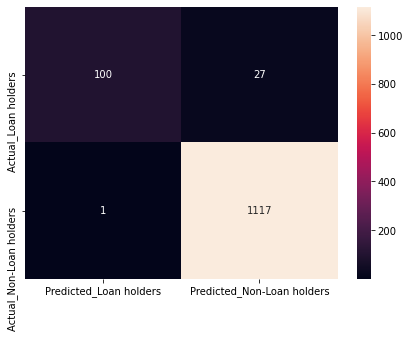

In [64]:
cm_s = metrics.confusion_matrix(y_test_new, sv_pred, labels=[1,0])

df_cm_s = pd.DataFrame(cm_s, index = [i for i in ["Actual_Loan holders","Actual_Non-Loan holders"]],
                  columns = [i for i in ["Predicted_Loan holders","Predicted_Non-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_s, annot=True ,fmt='g')
plt.show()

In [65]:
print("Classification Report")
print(metrics.classification_report(y_test_new, sv_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.99      0.79      0.88       127
           0       0.98      1.00      0.99      1118

    accuracy                           0.98      1245
   macro avg       0.98      0.89      0.93      1245
weighted avg       0.98      0.98      0.98      1245



**Observation** -

**From Confusion Metrics** -

- True Positives (**TP**): we correctly predicted as Loan holders - **100**

- True Negatives (**TN**): we correctly predicted as Non-Loan holders - **1117**

- False Positives (**FP**): we incorrectly predicted as Loan holders ("Type I error") - **1** 

- False Negatives (**FN**): we incorrectly predicted as Non-Loan holders ("Type II error") - **27**

**From Classification Report** -

**Precision** -  Is a  case where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.

**Recall** - Is a case where actually the personal was accepted by the customer but we predicted it as not accepted.

1. **Accuracy** - our model is 98% accurate.


2. **Precision** - 
- **Loan holders (Class 1)** - 99%
- **Non-Loan holders (Class 0)** - 98%
 
3. **Recall** - 
- **Loan holders (Class 1)** - 79%
- **Non-Loan holders (Class 0)** - 100%

(The data is imbalanced)

##### KNN 

In [66]:
#Train a Supervised Learning Classification base model - KNN
KNN = KNeighborsClassifier()
KNN.fit(x_train_new, y_train_new)
KNN_pred = KNN.predict(x_test_new)

print('Accuracy on Training data:',KNN.score(x_train_new, y_train_new))
print('Accuracy on Test data:',KNN.score(x_test_new, y_test_new))

Accuracy on Training data: 0.9686746987951808
Accuracy on Test data: 0.9582329317269076


**Observation** - Accuracy on Test data is almost similar.

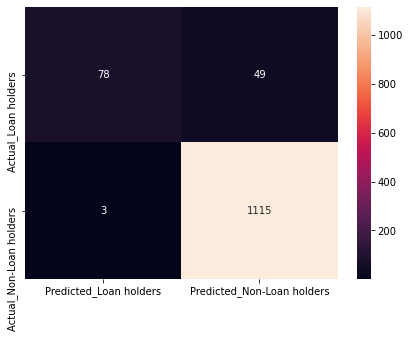

In [67]:
cm_s = metrics.confusion_matrix(y_test_new, KNN_pred, labels=[1,0])

df_cm_s = pd.DataFrame(cm_s, index = [i for i in ["Actual_Loan holders","Actual_Non-Loan holders"]],
                  columns = [i for i in ["Predicted_Loan holders","Predicted_Non-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_s, annot=True ,fmt='g')
plt.show()

In [68]:
print("Classification Report")
print(metrics.classification_report(y_test_new, KNN_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.61      0.75       127
           0       0.96      1.00      0.98      1118

    accuracy                           0.96      1245
   macro avg       0.96      0.81      0.86      1245
weighted avg       0.96      0.96      0.95      1245



**Observation** -

**From Confusion Metrics** -

- True Positives (**TP**): we correctly predicted as Loan holders - **78**

- True Negatives (**TN**): we correctly predicted as Non-Loan holders - **1115**

- False Positives (**FP**): we incorrectly predicted as Loan holders ("Type I error") - **3** 

- False Negatives (**FN**): we incorrectly predicted as Non-Loan holders ("Type II error") - **49**

 **From Classification Report** -

**Precision** -  Is a  case where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.

**Recall** - Is a case where actually the personal was accepted by the customer but we predicted it as not accepted.

1. **Accuracy** - our model is 96% accurate.


2. **Precision** - 
- **Loan holders (Class 1)** - 96%
- **Non-Loan holders (Class 0)** - 96%
 
3. **Recall** - 
- **Loan holders (Class 1)** - 61%
- **Non-Loan holders (Class 0)** - 100%

(The data is imbalanced)

###### B. Tune parameters for each of the models wherever required and finalize a model.

##### SVM - Hyperparameter tuning

In [69]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [10,1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train_new,y_train_new)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.5s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.5s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.5s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.5s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.1s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.1, gamma=10, k

[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [70]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [71]:
# use the best hyperparameters
#Train a Supervised Learning Classification base model - SVM
sv_hp = svm.SVC(C=100,gamma=0.01)
sv_hp.fit(x_train_new , y_train_new)
sv_hp_pred = sv_hp.predict(x_test_new)

print('Accuracy on Training data:',sv_hp.score(x_train_new, y_train_new))
print('Accuracy on Test data:',sv_hp.score(x_test_new, y_test_new))


Accuracy on Training data: 0.9863453815261044
Accuracy on Test data: 0.9823293172690764


**Observation** - Accuracy on Test data is almost similar.

##### KNN - Hyperparameter tuning

In [72]:
parameters = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

GS = GridSearchCV(KNeighborsClassifier(), parameters, verbose = 1, cv=3, n_jobs = -1)

G_res = GS.fit(x_train_new, y_train_new)

# find the best score
print('Best Score:', G_res.best_score_)

print()

# get the hyperparameters with the best score
print('Best Hyperparameters:', G_res.best_params_)

Fitting 3 folds for each of 168 candidates, totalling 504 fits
Best Score: 0.957429718875502

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


In [73]:
# use the best hyperparameters
#Train a Supervised Learning Classification base model - KNN
KNN_hp = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance', metric= 'minkowski', algorithm= 'auto')
KNN_hp.fit(x_train_new, y_train_new)
KNN_hp_pred = KNN_hp.predict(x_test_new)

print('Accuracy on Training data:',KNN_hp.score(x_train_new, y_train_new))
print('Accuracy on Test data:',KNN_hp.score(x_test_new, y_test_new))

Accuracy on Training data: 1.0
Accuracy on Test data: 0.9598393574297188


**Observation** - Accuracy in Test data is less than Train data. (Overfittting)

##### C. Print evaluation metrics for final model.

##### SVM - Confusion Metrics

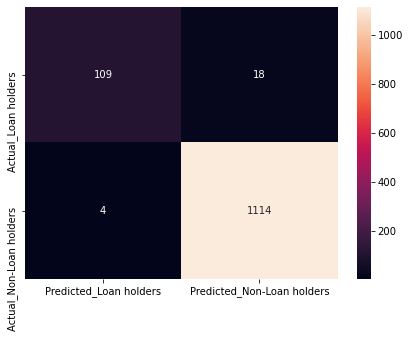

In [74]:
cm_s = metrics.confusion_matrix(y_test_new, sv_hp_pred, labels=[1,0])

df_cm_s = pd.DataFrame(cm_s, index = [i for i in ["Actual_Loan holders","Actual_Non-Loan holders"]],
                  columns = [i for i in ["Predicted_Loan holders","Predicted_Non-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_s, annot=True ,fmt='g')
plt.show()

In [75]:
print("Classification Report")
print(metrics.classification_report(y_test_new, sv_hp_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.86      0.91       127
           0       0.98      1.00      0.99      1118

    accuracy                           0.98      1245
   macro avg       0.97      0.93      0.95      1245
weighted avg       0.98      0.98      0.98      1245



##### KNN - Confusion Metrics 

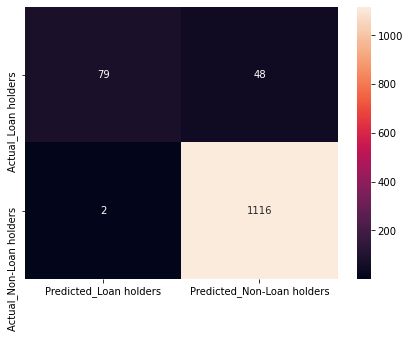

In [76]:
cm_s = metrics.confusion_matrix(y_test_new, KNN_hp_pred, labels=[1,0])

df_cm_s = pd.DataFrame(cm_s, index = [i for i in ["Actual_Loan holders","Actual_Non-Loan holders"]],
                  columns = [i for i in ["Predicted_Loan holders","Predicted_Non-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_s, annot=True ,fmt='g')
plt.show()

In [77]:
print("Classification Report")
print(metrics.classification_report(y_test_new, KNN_hp_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.98      0.62      0.76       127
           0       0.96      1.00      0.98      1118

    accuracy                           0.96      1245
   macro avg       0.97      0.81      0.87      1245
weighted avg       0.96      0.96      0.96      1245






##### D. Share improvement achieved from base model to final model.

##### SVM - Observation

**SVM Before Optimization** -
- Accuracy on Training data: 0.9796519410977242
- Accuracy on Test data: 0.9775100401606426

1. **Accuracy** - our model is 98% accurate.


2. **Precision** - 
- **Loan holders (Class 1)** - 99%
- **Non-Loan holders (Class 0)** - 98%
 
3. **Recall** - 
- **Loan holders (Class 1)** - 79%
- **Non-Loan holders (Class 0)** - 100%

**SVM After Optimization** -
- Accuracy on Training data: 0.9863453815261044
- Accuracy on Test data: 0.9823293172690764

1. **Accuracy** - our model is 98% accurate.


2. **Precision** - 
- **Loan holders (Class 1)** - 96%
- **Non-Loan holders (Class 0)** - 98%
 
3. **Recall** - 
- **Loan holders (Class 1)** - 86%
- **Non-Loan holders (Class 0)** - 100%



- Accuracy remains same after optimization.
- Precison for Loan holders have reduced from 99% to 96%
- Recall for Loan holders have increased from 79% to 86%.

(Since the data is imbalanced, the results are skewed)

The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests.Therefore, it would be recall that would hold more importance then precision.

##### KNN - Observations

**KNN Before Optimization** -
- Accuracy on Training data: 0.9686746987951808
- Accuracy on Test data: 0.9582329317269076

1. **Accuracy** - our model is 96% accurate.


2. **Precision** - 
- **Loan holders (Class 1)** - 96%
- **Non-Loan holders (Class 0)** - 96%
 
3. **Recall** - 
- **Loan holders (Class 1)** - 61%
- **Non-Loan holders (Class 0)** - 100%

**KNN After Optimization** -
- Accuracy on Training data: 1.0
- Accuracy on Test data: 0.9598393574297188

1. **Accuracy** - our model is 96% accurate.


2. **Precision** - 
- **Loan holders (Class 1)** - 98%
- **Non-Loan holders (Class 0)** - 96%
 
3. **Recall** - 
- **Loan holders (Class 1)** - 62%
- **Non-Loan holders (Class 0)** - 100%

- Accuracy remains same after optimization.
- Precison for Loan holders have increased from 96% to 98%
- Recall for Loan holders have increased from 61% to 62%.

(Since the data is imbalanced, the results are skewed)

The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests.Therefore, it would be recall that would hold more importance then precision.

-----